In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r'CCTV_in_Seoul.csv', index_col='기관명')
df

,소계,2013년도 이전,2014년,2015년,2016년
기관명,,,,,
강남구,2780,1292,430,584,932
강동구,773,379,99,155,377
강북구,748,369,120,138,204
강서구,884,388,258,184,81
관악구,1496,846,260,390,613
광진구,707,573,78,53,174
구로구,1561,1142,173,246,323
금천구,1015,674,51,269,354
노원구,1265,542,57,451,516


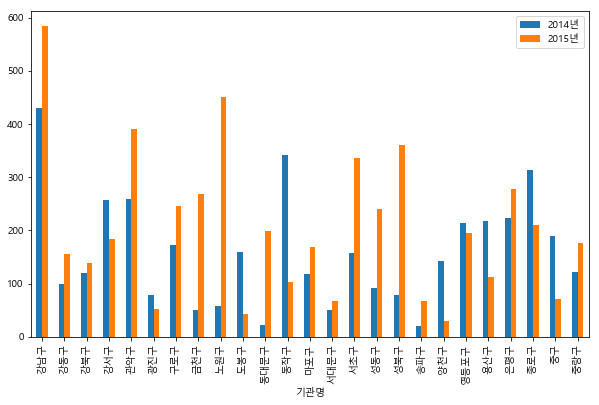

In [3]:
# 1. 2014년, 15년에 대한 바차트를 그리시오
df[['2014년', '2015년']].plot(kind='bar', figsize=(10,6))
plt.show()

In [13]:
# 2. cctv 소계가 가장 많은 top5 기관명(2014년 기준)
dt = [n for n in df.sort_values(by='소계', ascending=False)[:5].index]
dt

['강남구', '양천구', '서초구', '은평구', '용산구']

In [5]:
# 3.최근 2년동안 cctv 증가율을 구하시오
df[['2015년', '2016년']].sum(axis=1) / df[['2013년도 이전', '2014년']].sum(axis=1) * 100

기관명
강남구      88.037166
강동구     111.297071
강북구      69.938650
강서구      41.021672
관악구      90.687161
광진구      34.869432
구로구      43.269962
금천구      85.931034
노원구     161.435726
도봉구     107.808564
동대문구     71.088747
동작구      47.118644
마포구     126.851852
서대문구     40.268456
서초구      46.960972
성동구      61.632156
성북구      51.885925
송파구      96.545455
양천구      25.037783
영등포구     80.112835
용산구      32.156368
은평구      54.772394
종로구     108.097686
중구       69.651741
중랑구      45.396825
dtype: float64

In [6]:
# 4. cctv 소계 1000이상은 높음, 미만은 낮음으로 설치 정도 컬럼 추가하시오
df['설치 정도'] = df['소계'].apply(lambda v: '높음' if v >= 1000 else '낮음')
df

,소계,2013년도 이전,2014년,2015년,2016년,설치 정도
기관명,,,,,,
강남구,2780,1292,430,584,932,높음
강동구,773,379,99,155,377,낮음
강북구,748,369,120,138,204,낮음
강서구,884,388,258,184,81,낮음
관악구,1496,846,260,390,613,높음
광진구,707,573,78,53,174,낮음
구로구,1561,1142,173,246,323,높음
금천구,1015,674,51,269,354,높음
노원구,1265,542,57,451,516,높음


In [7]:
# 5. 2016년 cctv 수가 가장 높은 기관명의 2015년 cctv수, 2014년 cctv 수를 출력하시오

df[df['2016년'] == df['2016년'].max()][['2015년', '2014년']]

,2015년,2014년
기관명,,
강남구,584,430


In [10]:
# 6. 2013년도 이전과 2016년의 cctv 증가율 col을 생성
# 증가율이 1.2 이상이면 '급증', 1 이상이면 '보통', 그 외엔 '낮음' 컬럼 생성
def fn(v):
    ratio = v['2016년'] / v['2013년도 이전']
    if ratio >= 1.2:
        return '급증'
    elif ratio >= 1.0:
        return '보통'
    else:
        return '낮음'


In [12]:
df['2013 대비 2016 증가율'] = df.apply(fn, axis=1)
df

,소계,2013년도 이전,2014년,2015년,2016년,설치 정도,2013 대비 2016 증가율
기관명,,,,,,,
강남구,2780,1292,430,584,932,높음,낮음
강동구,773,379,99,155,377,낮음,낮음
강북구,748,369,120,138,204,낮음,낮음
강서구,884,388,258,184,81,낮음,낮음
관악구,1496,846,260,390,613,높음,낮음
광진구,707,573,78,53,174,낮음,낮음
구로구,1561,1142,173,246,323,높음,낮음
금천구,1015,674,51,269,354,높음,낮음
노원구,1265,542,57,451,516,높음,낮음
